# Python Data Science Toolkit

Core Python offers a high-level, general purpose, interpreted (with initial compile step), dynamic language. Other languages (like R), offer some advantages in the pure data science realm, but the general purpose nature of Python makes it very convenient to deploy and integrate into a product.

Core library gives us lists, dictionaries, and classes, but the true scientific/numerical computing power comes with a set of additional packages:
1. **NumPy**: http://www.numpy.org/
    - Core numerical computing library. Many packages built on top of NumPy. Important to understand as it is the base for many of the following packages, but you may end up touching it directly surprisingly infrequently.
    - Provides an N-dimensional array object
    - Linear algebra, broadcasting functions, ect.  
2. **SciPy**: https://www.scipy.org/
    - Tons of modules for science and engineering.
    - Linear algebra, optimization, statistics, signal/image processing, integration.
    - Basically, the place to go for any weird math problem   
3. **Matplotlib**: http://matplotlib.org/
    - Plotting library with core API very similar to MATLAB 
4. **Seaborn**: http://seaborn.pydata.org/
    - Based on Matplotlib, provides extra more advanced statistical plots as well as some nicer defaults to make all your other Matplotlib plots look better.
5. **Pandas**: http://pandas.pydata.org/
    - Data manipulation and analysis library built on both NumPy and Matplotlib. 
    - Provides DataFrame object which provides label-based indexing, grouping, quick plotting
6. **Jupyter/iPython**: http://jupyter.org/
    - Provides these epic notebooks
    - Extra tools and widgets to make these notebooks interactive
    

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (11, 6)

# Case Study: Predicting Titanic Survivors
We are given a csv file with information for passengers on the Titanic. Let's look at the top of this file

In [2]:
with open('train.csv') as f:
    print(f.read(1000))

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S
6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/

Pandas has a bunch of functions for reading in data from a variety of sources. We can put this csv directly into a DataFrame with the type for each column automatically detected.

In [3]:
print('Pandas import functions:')
[f for f in dir(pd) if f.startswith('read')]

Pandas import functions:


['read_clipboard',
 'read_csv',
 'read_excel',
 'read_fwf',
 'read_gbq',
 'read_hdf',
 'read_html',
 'read_json',
 'read_msgpack',
 'read_pickle',
 'read_sas',
 'read_sql',
 'read_sql_query',
 'read_sql_table',
 'read_stata',
 'read_table']

In [4]:
df = pd.read_csv('train.csv', index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Jupyter also lets us quickly read docstrings using Shift+Tab.

## Some Initial Exploration

Can start by looking at some summary statistics for our numeric columns. Right away we see our total survival rate of 38.3 %.

In [5]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Indexing

DataFrames let us do some high level subsetting of our data. Columns can be pulled out by their names.

In [6]:
df['Age']

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
6       NaN
7      54.0
8       2.0
9      27.0
10     14.0
11      4.0
12     58.0
13     20.0
14     39.0
15     14.0
16     55.0
17      2.0
18      NaN
19     31.0
20      NaN
21     35.0
22     34.0
23     15.0
24     28.0
25      8.0
26     38.0
27      NaN
28     19.0
29      NaN
30      NaN
       ... 
862    21.0
863    48.0
864     NaN
865    24.0
866    42.0
867    27.0
868    31.0
869     NaN
870     4.0
871    26.0
872    47.0
873    33.0
874    47.0
875    28.0
876    15.0
877    20.0
878    19.0
879     NaN
880    56.0
881    25.0
882    33.0
883    22.0
884    28.0
885    25.0
886    39.0
887    27.0
888    19.0
889     NaN
890    26.0
891    32.0
Name: Age, dtype: float64

We can then apply functions to these subsets. There are a bunch of build in functions for common operations (like isnull), but we could also use the apply function to apply arbitrary functions.

In [7]:
df['Age'].isnull().value_counts()
# df['Age'].apply(lambda x: np.isnan(x)).value_counts()

False    714
True     177
Name: Age, dtype: int64

We can use functions that return boolean arrays to do some fancy indexing.

In [8]:
df[(df['Age'] > 40)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S
53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S
93,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.1750,E31,S


In [9]:
df[df['Name'].str.startswith('D')]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
45,1,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.8792,NaN,Q
80,1,3,"Dowdell, Miss. Elizabeth",female,30.0,0,0,364516,12.4750,NaN,S
94,0,3,"Dean, Mr. Bertram Frank",male,26.0,1,2,C.A. 2315,20.5750,NaN,S
99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S
131,0,3,"Drazenoic, Mr. Jozef",male,33.0,0,0,349241,7.8958,NaN,C
281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
284,1,3,"Dorking, Mr. Edward Arthur",male,19.0,0,0,A/5. 10482,8.0500,NaN,S
321,0,3,"Dennis, Mr. Samuel",male,22.0,0,0,A/5 21172,7.2500,NaN,S
322,0,3,"Danoff, Mr. Yoto",male,27.0,0,0,349219,7.8958,NaN,S


The index is also quite smart so we can give it a range and it will return all rows where the index falls inside the range. This is really handy when the index is a time series (you can then specify a time range and get all rows that fall within it).

In [10]:
df.ix[1:5]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We can also quickly add columns to our dataframe by applying functions to other columns. Pandas is smart and merges them nicely using the index. For instance, we might want to make a *Family* column that is the number of family members on board the Titanic. We could do this by combining the *SibSp* (siblings) and *Parch* (parents) columns.

In [11]:
df['Family'] = df['SibSp'] + df['Parch']
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


## Grouping

We can look at the survivor breakdown by gender by grouping our dataframe.

In [12]:
df.groupby(['Sex','Survived'])

This gives us a groupby object that we can apply aggregate functions to (or an arbitrary functions using *apply*). We can just look at the size of each group for now.

In [13]:
df.groupby(['Sex','Survived']).size()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

This gives us a Series (like a 1d DataFrame) with a hierarchical index. We can unstack this into a DataFrame to get ready for plotting.

In [14]:
df.groupby(['Sex','Survived']).size().unstack()

Survived,0,1
Sex,,
female,81,233
male,468,109


Pandas has some plotting APIs for DataFrames and Series that we can use.

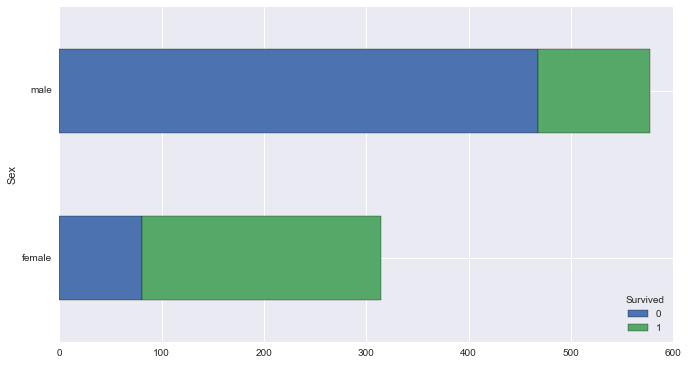

In [15]:
df.groupby(['Sex','Survived']).size().unstack().plot(kind='barh', stacked=True)

This returns a matplotlib object that we can hold onto if we need to add extra things to our plot. For instance, we can add a textbox with the total survivor rate.

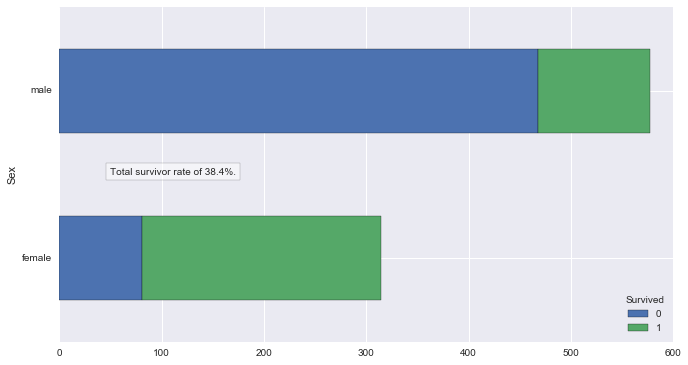

In [16]:
ax = df.groupby(['Sex','Survived']).size().unstack().plot(kind='barh', stacked=True)
ax.text(50, 0.5, 'Total survivor rate of %0.1f%%.' % (df['Survived'].mean() * 100), 
          bbox=dict(facecolor='white', alpha=0.5))

## Visualizing Distributions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10bb05d68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10be19198>]], dtype=object)

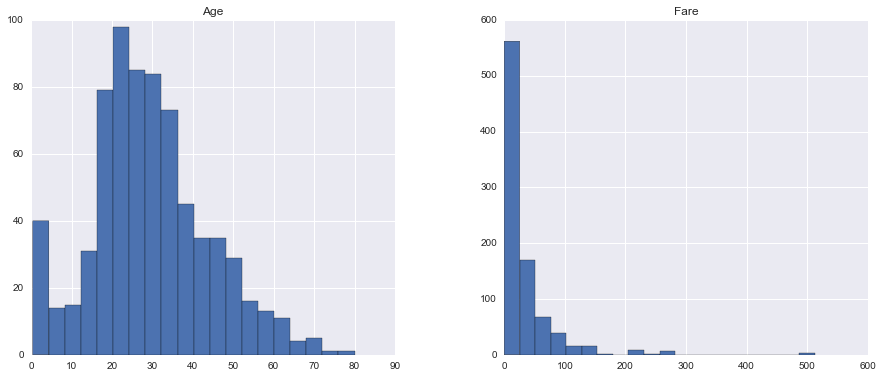

In [17]:
df.hist(column=['Age', 'Fare'], bins=20, figsize=(15, 6))

Sex
female    Axes(0.125,0.125;0.775x0.775)
male      Axes(0.125,0.125;0.775x0.775)
Name: Age, dtype: object

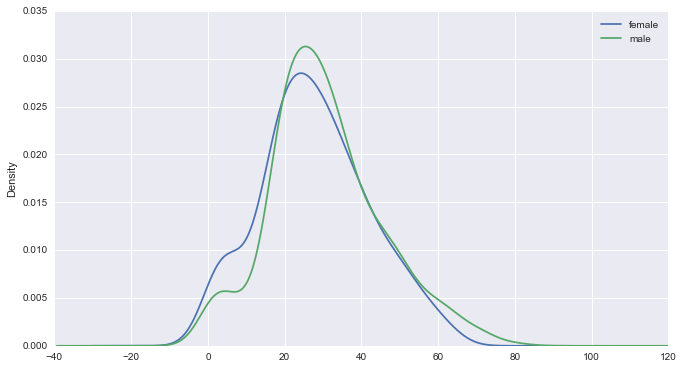

In [18]:
df.groupby('Sex')['Age'].plot.kde(legend=True)

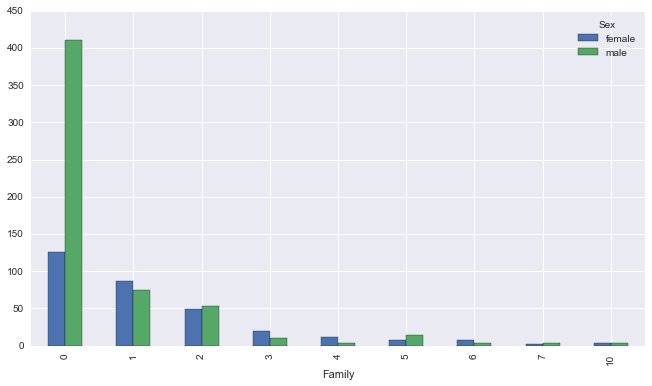

In [19]:
df.groupby(['Family', 'Sex']).size().unstack().plot(kind='bar')

We can also provide custom age bins to make sure that our visualizations are comparable across figures.

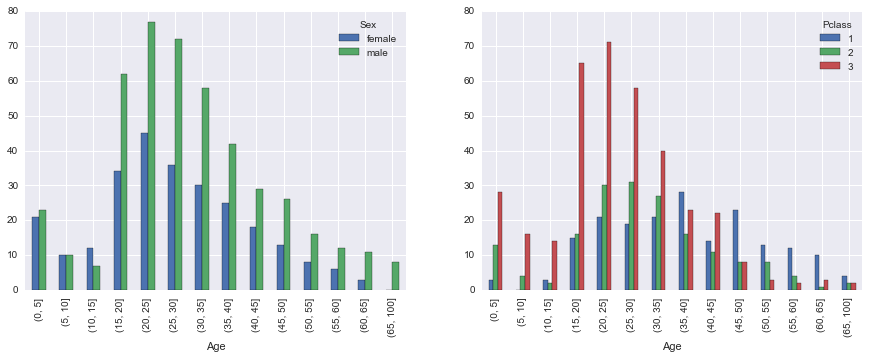

In [20]:
age_binned, age_bins = pd.cut(df['Age'], list(range(0, 66, 5)) + [100], retbins=True)
age_sex_grouped = df.groupby([age_binned, 'Sex'])
age_class_grouped = df.groupby([age_binned, 'Pclass'])

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
age_sex_grouped.size().unstack().plot(kind='bar', ax=axs[0])
age_class_grouped.size().unstack().plot(kind='bar', ax=axs[1])

## Age and class survival rate
We can then look at the survival breakdown for the same age categories and class. In general, we see that younger and first class people were more likely to survive.

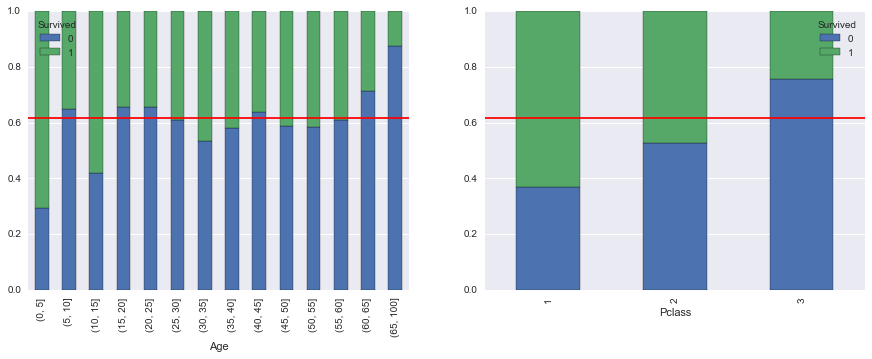

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

age_surv_grouped = df.groupby([age_binned, 'Survived'])
age_surv = age_surv_grouped.size().unstack()
age_surv.div(age_surv.sum(axis=1), axis=0).plot(kind='bar', stacked=True, ax=axs[0])

class_surv_grouped = df.groupby(['Pclass', 'Survived'])
class_surv = class_surv_grouped.size().unstack()
class_surv.div(class_surv.sum(axis=1), axis=0).plot(kind='bar', stacked=True, ax=axs[1])

for ax in axs: ax.plot(ax.get_xlim(), np.ones(2) * (1-df['Survived'].mean()), 'r')

## Exploratory Plots
These are meant to help the data scientist view as many variables as possible to hunt for any correleations or trends. These are not meant to be presented but are are great for exploration. Seaborn has some great functions for doing this.

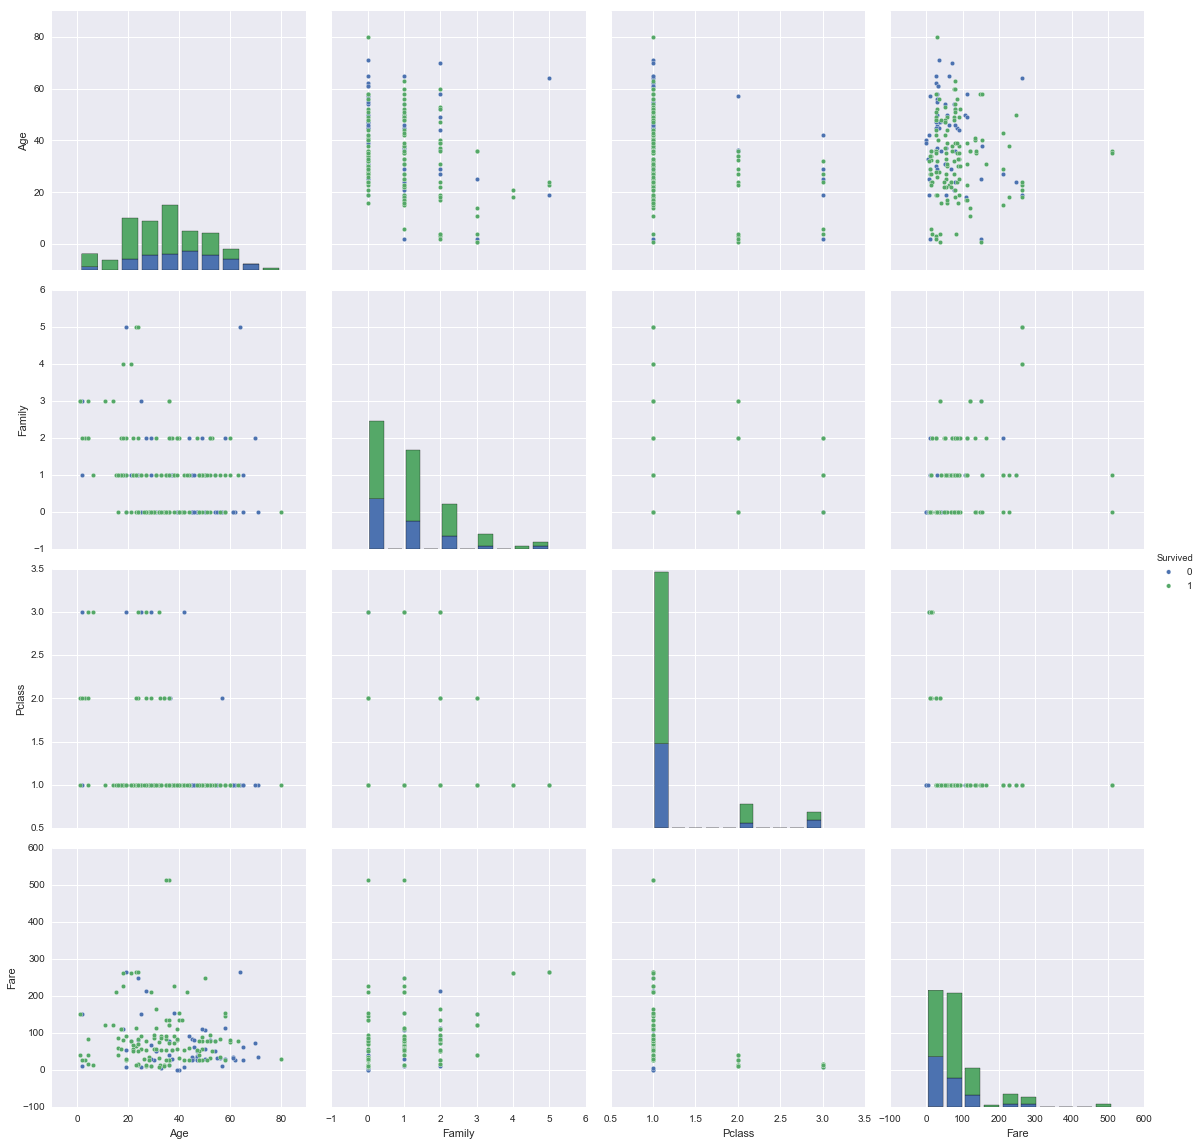

In [22]:
sns.pairplot(df.dropna(), vars=['Age', 'Family', 'Pclass', 'Fare'], hue='Survived', size=4)

Since we have a lot of categorical data, some of the above plots are hard to read. We can fix this by either adding jitter to the categorical axis or using a different plot type.

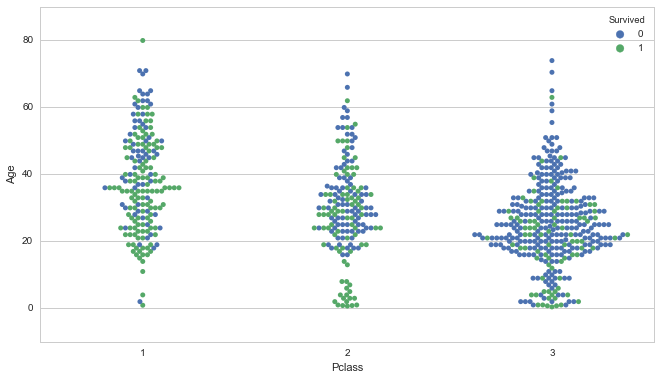

In [23]:
with sns.axes_style('whitegrid'):
    sns.swarmplot(x='Pclass', y='Age', hue='Survived', data=df)